# 01. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import Data

In [4]:
# Turn project folder path into a string
path = r'C:\Users\marze\CF Projects\08-2024 Instacart Basket Analysis'

In [5]:
# Import orders_products_grouped_aggregated.pkl
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_grouped_aggregated.pkl'))

# 03. Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

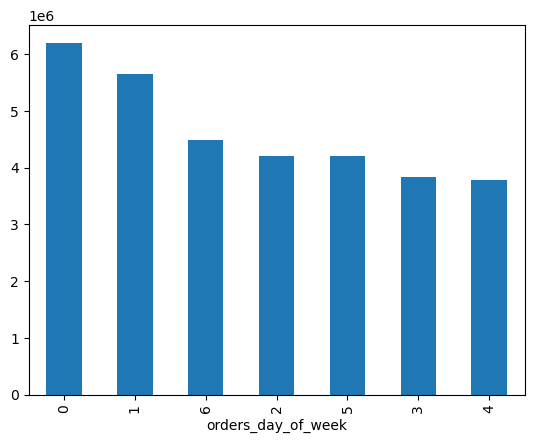

In [7]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

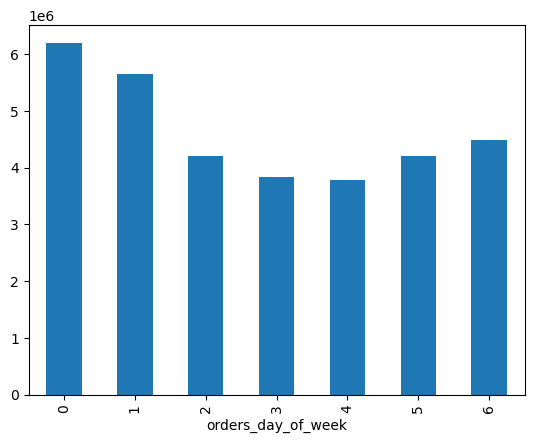

In [8]:
#The sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest).
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
#ame trick can actually be used when printing frequencies
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [10]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

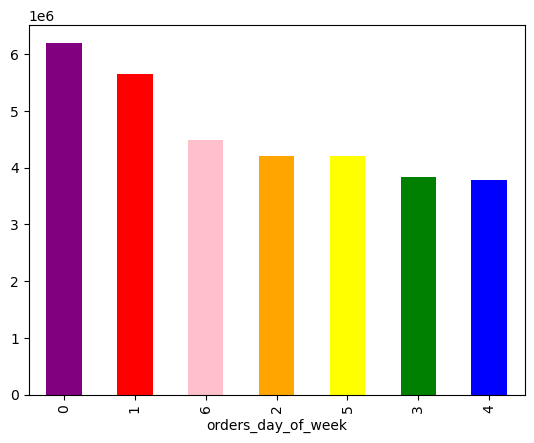

In [11]:
# add color to your plot
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# 04. Exporting Charts

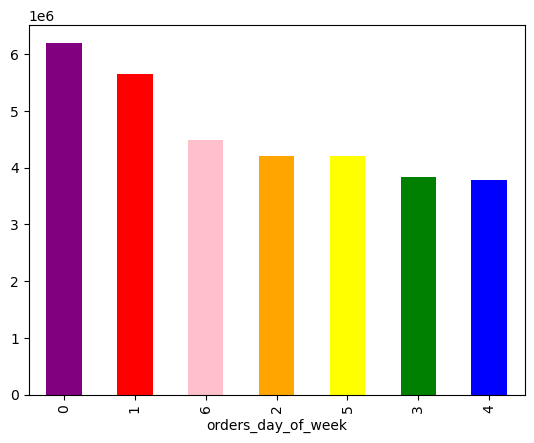

In [13]:
# save chart in Jupyter memory
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [14]:
# export chart outisde of Jupyter
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 05. Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

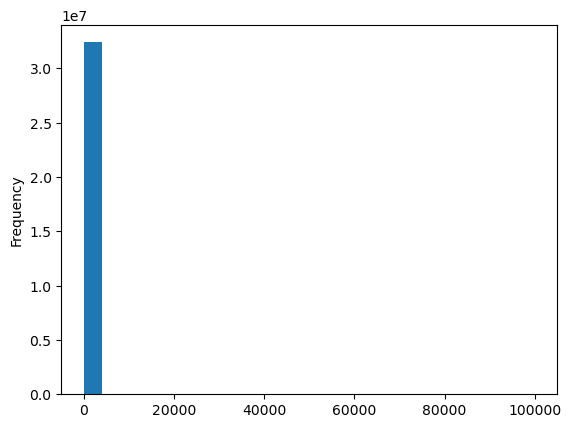

In [16]:
# histogram of the “prices” column
ords_prods_merge['prices'].plot.hist(bins = 25)

The 'bins' argument is how you determine the granularity of the histogram. A smaller number of bins equates to denser bars, while a larger number of bins equates to sparser bars.

In [18]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [19]:
ords_prods_merge['prices'].mean()

11.980225638383468

In [20]:
ords_prods_merge['prices'].median()

7.4

In [21]:
ords_prods_merge['prices'].max()

99999.0

While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost $99,999.00? This must be the result of data corruption or some kind of special value within the data. This is also what’s breaking your histogram—having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above.

<Axes: xlabel='prices', ylabel='prices'>

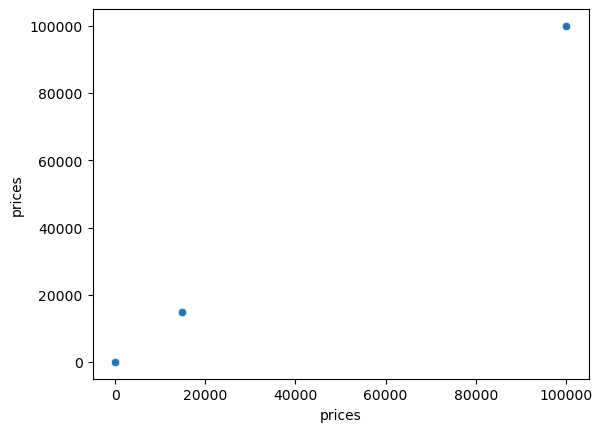

In [23]:
# scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

Scatterplots are created by way of the scatterplot() function, which is included in the seaborn library (imported into your notebook as sns). Within the parentheses, you include arguments in the form of axes. Here, the “prices” column has been used for both the x- and y-axes. The mean of the column is around 12, so you’d expect the data points to be distributed somewhere around this number. However, there are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000. This close-to-100,000 value corresponds to the max value you identified in your checks. But what about the close-to-20,000 value? To investigate this, you can run a few more exploratory checks on your data.

In [25]:
#Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. If you imagined the maximum price anyone would pay in a supermarket were around $100, then anything above that amount could be considered an outlier.
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_between_orders,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


#From the output, you can see that there are 5,127 rows with outlier observations (prices greater than $100). In addition, at the top of the “prices” column, you can see that there’s another odd value, $14,900.00, which corresponds to the second unexplainable point in the scatterplot. Following this is the $99,999.00 you identified previously. As such, you can assume that it’s the $14,900.00 and $99,999.00 values that are skewing your charts.

In [27]:
#For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs, use the following code:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [28]:
#running a max-value check on your “prices” column
ords_prods_merge['prices'].max()

25.0

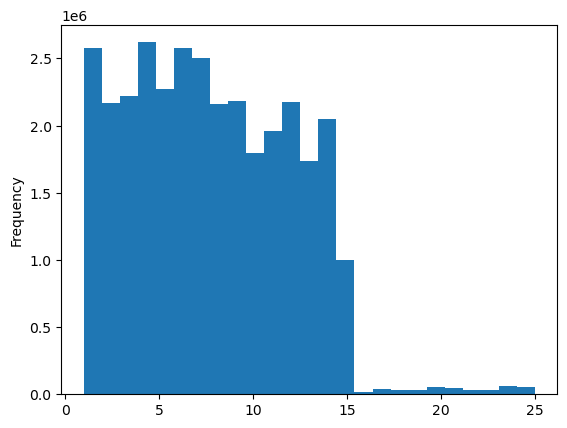

In [29]:
# histogram of the “prices” column
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

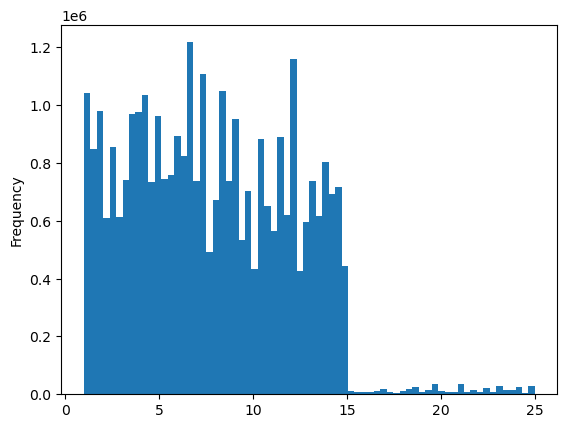

In [30]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [31]:
# export histogram outisde of Jupyter
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_prices.png'))

# 06. Creating Line Charts

### A. Sampling Data

Creating these samples requires a list of random floating numbers between 0 and 1 (with 1 representing 100 percent of the dataframe) that’s as long as the length of the dataframe. Each row in the dataframe is “assigned” one of these numbers, and then the numbers are compared to a value. In this case, the value is 0.7, since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio

In [59]:
# set the seed. The value you put inside the seed doesn’t actually matter in the grand scheme of things. 
#Whether you use 1, 52, 179, or 4, all you’re doing is ensuring that the random distribution you’re creating is reproducible. 
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [61]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [63]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [65]:
#You now have a list of 32,434,212 boolean values and a dataframe that’s 32,434,212 rows long. How can you use your list to split your dataframe into two samples?
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

The two dataframes above, big and small, are the samples you’ll create from your ords_prods_merge dataframe. What you want to do is store 70 percent of your dataframe in the big sample and 30 percent of your dataframe in the small sample. You’ll do this according to the values in your dev list. For every value in the list that’s True, the corresponding row in your ords_prods_merge dataframe will be stored in the big sample. For every value in the list that’s False, the corresponding row in your dataframe will be stored in the small sample. Since True and False were determined by whether or not the random number was less than or greater than 0.7, this means that 70 percent of the rows should logically be sorted into big and 30 percent of the rows should logically be sorted into small. The tilde you see in the second line negates the argument, in other words, it stores everything that’s not dev, or False.

In [68]:
len(ords_prods_merge)

32404859

In [70]:
len(big) + len(small)

32404859

As one last step before creating that chart, let’s do something that will speed up the processing time even further—reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.” You can achieve this by running (and checking the result!) of the following command:

In [73]:
df_2 = small[['orders_day_of_week','prices']]

In [75]:
df_2

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8
...,...,...
32404841,6,13.5
32404842,6,13.5
32404843,5,13.5
32404849,6,13.5


### B. Create chart

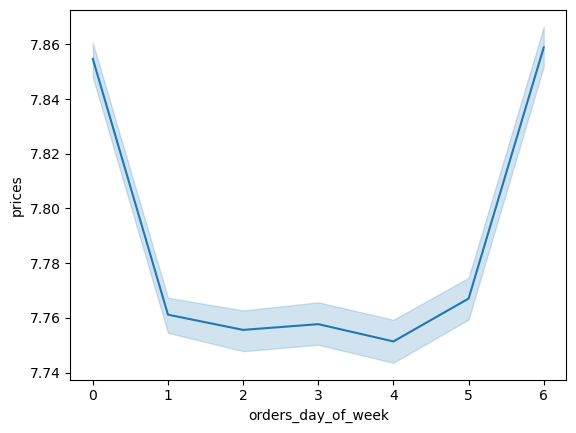

In [79]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')